In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
# If the tf.__version__ is 1.x, please run this cell
#!pip install tensorflow==2.0.0-beta0

In [3]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0


In [4]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [5]:
tokenizer = info.features['text'].encoder

In [7]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE,  tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 162s 414ms/step - loss: 0.4464 - accuracy: 0.7822 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 160s 409ms/step - loss: 0.2205 - accuracy: 0.9171 - val_loss: 0.2933 - val_accuracy: 0.8784
Epoch 3/10
391/391 [==============================] - 162s 415ms/step - loss: 0.1678 - accuracy: 0.9390 - val_loss: 0.3275 - val_accuracy: 0.8684
Epoch 4/10
391/391 [==============================] - 163s 417ms/step - loss: 0.1353 - accuracy: 0.9524 - val_loss: 0.3832 - val_accuracy: 0.8665
Epoch 5/10
391/391 [==============================] - 162s 413ms/step - loss: 0.1097 - accuracy: 0.9610 - val_loss: 0.3960 - val_accuracy: 0.8636
Epoch 6/10
391/391 [==============================] - 164s 419ms/step - loss: 0.0893 - accuracy: 0.9710 - val_loss: 0.5033 - val_accuracy: 0.8589
Epoch 7/10
391/391 [==============================] - 163s 416ms/step - loss: 0.0721 - accuracy: 0.9768 - val_loss: 

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

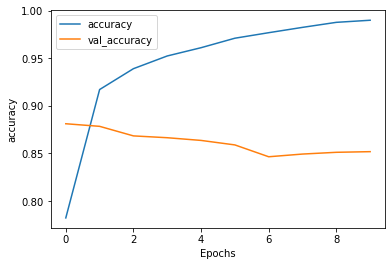

In [13]:
plot_graphs(history, 'accuracy')

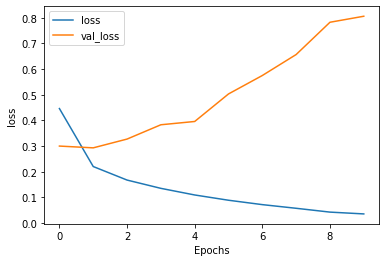

In [14]:
plot_graphs(history, 'loss')